# Modified Version

The below codes are used in the project `Inference and Learning for Latent Temporal Logic Point Processes`.

In [2]:
import numpy as np
import itertools


##################################################################
np.random.seed(1)   #TODO: set the random seed
class Logic_Model_Generator:
    '''
    We have
        1. 7 predicates: 3 mental processes (A,B,C) and 4 action processes (D,E,F,G)
        2. 8 rules
    '''


    # for example, consider three rules:
    # A and B and Equal(A,B), and Before(A, D), then D;
    # C and Before(C,Not D), then Not D
    # D Then E, and Equal(D, E)
    # note that define the temporal predicates as compact as possible

    def __init__(self):

        ### the following parameters are used to manually define the logic rules
        self.num_predicate = 7                  # num_predicate is same as num_node
        self.num_formula = 8                    # num of prespecified logic rules
        self.BEFORE = 'BEFORE'
        self.EQUAL = 'EQUAL'
        self.AFTER = 'AFTER'
        self.Time_tolerance = 0.3               
        self.body_predicate_set = []                        # the index set of all body predicates
        self.mental_predicate_set = [0, 1, 2]
        self.action_predicate_set = [3, 4, 5, 6]
        self.head_predicate_set = [0, 1, 2, 3, 4, 5, 6]     # the index set of all head predicates
        self.decay_rate = 1                                 # decay kernel

        ### the following parameters are used to generate synthetic data
        ### for the learning part, the following is used to claim variables
        ### self.model_parameter = {0:{},1:{},...,6:{}}
        self.model_parameter = {}

        '''
        mental
        '''

        head_predicate_idx = 0
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.7

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.6
        formula_idx = 1
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.4

        head_predicate_idx = 1
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.3

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.2
        formula_idx = 1
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 0.8

        head_predicate_idx = 2
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.4

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0


        '''
        action
        '''
        head_predicate_idx = 3
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.1

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        head_predicate_idx = 4
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.21

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        head_predicate_idx = 5
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.3

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        head_predicate_idx = 6
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = -0.35

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = 1.0

        
        #NOTE: set the content of logic rules
        self.logic_template = self.logic_rule()

    def logic_rule(self):
        # encode rule information
        '''
        This function encodes the content of logic rules
        logic_template = {0:{},1:{},...,6:{}}
        '''
        logic_template = {}


        '''
        Mental (0-2)
        '''

        head_predicate_idx = 0
        logic_template[head_predicate_idx] = {} # here 0 is the index of the head predicate; we could have multiple head predicates


        #NOTE: rule content: (2 and 3 and 4) and before(2,0) and before(3,0) and before(4,0) \to 0
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [2, 3, 4]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1, 1]  # use 1 to indicate True; use -1 to indicate False
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[2, 0],  [3, 0], [4, 0]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE, self.BEFORE]


        #NOTE: rule content: ((\neg 0 and (2 and 6)) and after(6,0) and equal(2,0) \to \neg 0)
        formula_idx = 1
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 2, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [-1, 1, 1]  # use 1 to indicate True; use -1 to indicate False
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[6, 0], [2, 0]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.AFTER, self.EQUAL]

        head_predicate_idx = 1
        logic_template[head_predicate_idx] = {}  # here 1 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: 5 and before(5,1) to 1
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [5]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[5, 1]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]

        #NOTE: rule content: (4 and 6) and before(6,1) to \neg 1
        formula_idx = 1
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [4, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[6, 1]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]


        head_predicate_idx = 2
        logic_template[head_predicate_idx] = {}  # here 2 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (\neg 1 and 6) and after(2,1) to 2
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [1, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [-1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[1, 2]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.AFTER]



        '''
        Action (3-6)
        '''
        head_predicate_idx = 3
        logic_template[head_predicate_idx] = {}  # here 3 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (0 and \neg 1) and before(0,1) and before(1,3) \to 3
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 1]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, -1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[0, 1], [1, 3]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE]


        head_predicate_idx = 4
        logic_template[head_predicate_idx] = {}  # here 4 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (2) and before(2,4) \to 4
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [2]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[2, 4]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]

        
        head_predicate_idx = 5
        logic_template[head_predicate_idx] = {}  # here 5 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (0 and \neg 1) and before(0,5) and after(1,5) \to 5
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 1]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, -1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[0, 5], [1, 5]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.AFTER]


        head_predicate_idx = 6
        logic_template[head_predicate_idx] = {}  # here 6 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (1 and 2) and before(1,6) and before(2,6) \to \neg 6
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [1, 2]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[1, 6], [2, 6]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE]


        return logic_template


    def intensity(self, cur_time, head_predicate_idx, history):
        feature_formula = []
        weight_formula = []
        effect_formula = []
        #TODO: Check if the head_prediate is a mental predicate
        if head_predicate_idx in self.mental_predicate_set: flag = 0
        else: flag = 1  #NOTE: action

        for formula_idx in list(self.logic_template[head_predicate_idx].keys()): # range all the formula for the chosen head_predicate
            weight_formula.append(self.model_parameter[head_predicate_idx][formula_idx]['weight'])
            feature_formula.append(self.get_feature(cur_time=cur_time, head_predicate_idx=head_predicate_idx,
                                                    history=history, template=self.logic_template[head_predicate_idx][formula_idx], flag=flag))
            effect_formula.append(self.get_formula_effect(cur_time=cur_time, head_predicate_idx=head_predicate_idx,
                                                       history=history, template=self.logic_template[head_predicate_idx][formula_idx]))
        intensity = np.exp(np.array(weight_formula))/ np.sum( np.exp(np.array(weight_formula)), axis=0) * np.array(feature_formula) * np.array(effect_formula)

        intensity = self.model_parameter[head_predicate_idx]['base'] + np.sum(intensity)
        intensity = np.exp(intensity)
        return intensity

    def get_feature(self, cur_time, head_predicate_idx, history, template, flag:int):
        #NOTE: flag: 0 or 1, denotes the head_predicate_idx is a mental or an action
        #NOTE: 0 for mental and 1 for action
        #NOTE: since for mental, we need to go through all the history information
        #NOTE: while for action, we only care about the current time information
        transition_time_dic = {}
        feature = 0
        for idx, body_predicate_idx in enumerate(template['body_predicate_idx']):
            transition_time = np.array(history[body_predicate_idx]['time'])
            transition_state = np.array(history[body_predicate_idx]['state'])
            mask = (transition_time <= cur_time) * (transition_state == template['body_predicate_sign'][idx]) # find corresponding history
            transition_time_dic[body_predicate_idx] = transition_time[mask]
        transition_time_dic[head_predicate_idx] = [cur_time]
        ### get weights
        # compute features whenever any item of the transition_item_dic is nonempty
        history_transition_len = [len(i) for i in transition_time_dic.values()]
        if min(history_transition_len) > 0:
            # need to compute feature using logic rules
            time_combination = np.array(list(itertools.product(*transition_time_dic.values()))) # get all possible time combinations
            time_combination_dic = {}
            for i, idx in enumerate(list(transition_time_dic.keys())):
                #TODO: this is where we distinguish mental and action
                time_combination_dic[idx] = time_combination[:, i] if flag == 0 else time_combination[-1, i]
            temporal_kernel = np.ones(len(time_combination))
            for idx, temporal_relation_idx in enumerate(template['temporal_relation_idx']):
                time_difference = time_combination_dic[temporal_relation_idx[0]] - time_combination_dic[temporal_relation_idx[1]]
                if template['temporal_relation_type'][idx] == 'BEFORE':
                    temporal_kernel *= (time_difference < - self.Time_tolerance) * np.exp(-self.decay_rate * (cur_time - time_combination_dic[temporal_relation_idx[0]]))
                if template['temporal_relation_type'][idx] == 'EQUAL':
                    temporal_kernel *= (abs(time_difference) <= self.Time_tolerance) * np.exp(-self.decay_rate *(cur_time - time_combination_dic[temporal_relation_idx[0]]))
                if template['temporal_relation_type'][idx] == 'AFTER':
                    temporal_kernel *= (time_difference > self.Time_tolerance) * np.exp(-self.decay_rate * (cur_time - time_combination_dic[temporal_relation_idx[1]]))
            feature = np.sum(temporal_kernel)
        return feature

    def get_formula_effect(self, cur_time, head_predicate_idx, history, template):
        ## Note this part is very important!! For generator, this should be np.sum(cur_time > head_transition_time) - 1
        ## Since at the transition times, choose the intensity function right before the transition time
        head_transition_time = np.array(history[head_predicate_idx]['time'])
        head_transition_state = np.array(history[head_predicate_idx]['state'])
        if len(head_transition_time) == 0:
            cur_state = 0
            counter_state = 1 - cur_state
        else:
            idx = np.sum(cur_time > head_transition_time) - 1
            cur_state = head_transition_state[idx]
            counter_state = 1 - cur_state

        if counter_state == template['head_predicate_sign']:
            formula_effect = 1              # the formula encourages the head predicate to transit
        else:
            formula_effect = -1
        return formula_effect


    def generate_data(self, num_sample:int, time_horizon:int):
        data={}
        intensity = {}

        # initialize intensity function for body predicates
        '''
        for predicate_idx in [0, 1]:
            intensity[predicate_idx] = 0.5 # add some base terms, spontaneous triggering, can change at will

        for predicate_idx in [2]:
            intensity[predicate_idx] = 1 # can change at will
        '''

        #NOTE: data = {0:{},1:{},....,num_sample:{}}
        for sample_ID in np.arange(0, num_sample, 1):
            data[sample_ID] = {}                        # each data[sample_ID] stores one realization of the point process
            # initialize data
            #NOTE: data[sample_ID] = {0:{'time':[], 'state':[]}, 1:{'time':[], 'state':[]},..., num_predicate:{'time':[], 'state':[]}}
            for predicate_idx in np.arange(0, self.num_predicate, 1):
                data[sample_ID][predicate_idx] = {}
                data[sample_ID][predicate_idx]['time'] = [0]
                data[sample_ID][predicate_idx]['state'] = [0]

            #TODO: in my project, all the predicates are head predicates. All of them need to be generated by the accept-reject method
            '''
            # generate data (body predicates)
            for body_predicate_idx in self.body_predicate_set:  # body predicate events happens spontaneously according to its own intensity
                t = 0   # sample eacn body predicate separately
                while t < time_horizon:
                    time_to_event = np.random.exponential(scale=1.0 / intensity[body_predicate_idx])    # draw the next event time: according to the exp dist
                    next_event_time = data[sample_ID][body_predicate_idx]['time'][-1] + time_to_event
                    if next_event_time > time_horizon: break
                    data[sample_ID][body_predicate_idx]['time'].append(next_event_time)
                    cur_state = 1 - data[sample_ID][body_predicate_idx]['state'][-1]    # state transition
                    data[sample_
                    ID][body_predicate_idx]['state'].append(cur_state)      # append the new state
                    t = next_event_time                                                 # update cur_time
            '''



            for head_predicate_idx in self.head_predicate_set:
                '''
                data[sample_ID][head_predicate_idx] = {}
                data[sample_ID][head_predicate_idx]['time'] = [0]
                data[sample_ID][head_predicate_idx]['state'] = [0]
                '''
                #TODO
                if head_predicate_idx in self.mental_predicate_set: flag = 0
                else: flag = 1

                # obtain the maximal intensity
                #NOTE: the intensity for each head predicate is time-dependent
                intensity_potential = []
                for t in np.arange(0, time_horizon, 0.1):
                    intensity_potential.append(self.intensity(t, head_predicate_idx, data[sample_ID]))
                intensity_max = max(intensity_potential)
                #print('the maximum intensity is {}'.format(intensity_max))  # print the envelop
                # generate events via accept and reject
                t = 0   # cur_time
                while t < time_horizon:
                    time_to_event = np.random.exponential(scale=1.0/intensity_max)  # sample the interarrival time
                    t = t + time_to_event
                    if t > time_horizon: break  #NOTE: the next event time exceeds the time horizon
                    ratio = min(self.intensity(t, head_predicate_idx, data[sample_ID]) / intensity_max, 1)
                    #TODO
                    #print('the result you want >>> ', self.intensity(t, head_predicate_idx, data[sample_ID]))

                    flag = np.random.binomial(1, ratio)     # if flag = 1, accept, if flag = 0, regenerate
                    if flag == 1: # accept
                        data[sample_ID][head_predicate_idx]['time'].append(t)               # append the new transition time
                        cur_state = 1 - data[sample_ID][head_predicate_idx]['state'][-1]    # state transition
                        data[sample_ID][head_predicate_idx]['state'].append(cur_state)      # append the new state
                    # else (reject): continue

        return data

In [1]:
import numpy as np
import itertools
import torch.nn as nn
from torch.autograd import Variable
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
##################################################################

class Logic_Model(nn.Module):
    '''
    We have
        1. 7 predicates: 3 mental processes (A,B,C) and 4 action processes (D,E,F,G)
        2. 8 rules
    '''

    # for example, consider three rules:
    # A and B and Equal(A,B), and Before(A, D), then D;
    # C and Before(C, Not D), then  Not D
    # D Then  E, and Equal(D, E)
    # note that define the temporal predicates as compact as possible

    def __init__(self):

        ### the following parameters are used to manually define the logic rules
        self.num_predicate = 7                  # num_predicate is same as num_node
        self.num_formula = 8                    # num of prespecified logic rules
        self.BEFORE = 'BEFORE'
        self.EQUAL = 'EQUAL'
        self.AFTER = 'AFTER'
        self.Time_tolerance = 0.3               
        self.body_predicate_set = []                        # the index set of all body predicates
        self.mental_predicate_set = [0, 1, 2]
        self.action_predicate_set = [3, 4, 5, 6]
        self.head_predicate_set = [0, 1, 2, 3, 4, 5, 6]     # the index set of all head predicates
        self.decay_rate = 1                                 # decay kernel
        self.integral_resolution = 0.03

        ### the following parameters are used to generate synthetic data
        ### for the learning part, the following is used to claim variables
        ### self.model_parameter = {0:{},1:{},...,6:{}}
        self.model_parameter = {}
        
        '''
        mental
        '''

        head_predicate_idx = 0
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = torch.autograd.Variable((torch.ones(1) * -0.3).double(), requires_grad=True)

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.01).double(), requires_grad=True)
        formula_idx = 1
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.01).double(), requires_grad=True)

        head_predicate_idx = 1
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = torch.autograd.Variable((torch.ones(1) * -0.3).double(), requires_grad=True)

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.02).double(), requires_grad=True)
        formula_idx = 1
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.01).double(), requires_grad=True)

        head_predicate_idx = 2
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = torch.autograd.Variable((torch.ones(1) * -0.2).double(), requires_grad=True)

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.1).double(), requires_grad=True)



        '''
        action
        '''
        head_predicate_idx = 3
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = torch.autograd.Variable((torch.ones(1) * -0.1).double(), requires_grad=True)

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.01).double(), requires_grad=True)

        head_predicate_idx = 4
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = torch.autograd.Variable((torch.ones(1) * -0.25).double(), requires_grad=True)

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.05).double(), requires_grad=True)

        head_predicate_idx = 5
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = torch.autograd.Variable((torch.ones(1) * -0.6).double(), requires_grad=True)

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.8).double(), requires_grad=True)

        head_predicate_idx = 6
        self.model_parameter[head_predicate_idx] = {}
        self.model_parameter[head_predicate_idx]['base'] = torch.autograd.Variable((torch.ones(1) * -0.1).double(), requires_grad=True)

        formula_idx = 0
        self.model_parameter[head_predicate_idx][formula_idx] = {}
        self.model_parameter[head_predicate_idx][formula_idx]['weight'] = torch.autograd.Variable((torch.ones(1) * 0.05).double(), requires_grad=True)




        #NOTE: set the content of logic rules
        self.logic_template = self.logic_rule()


    def logic_rule(self):
        #TODO: the logic rules encode the prior knowledge
        # encode rule information
        '''
        This function encodes the content of logic rules
        logic_template = {0:{},1:{},...,6:{}}
        '''
        logic_template = {}


        '''
        Mental (0-2)
        '''

        head_predicate_idx = 0
        logic_template[head_predicate_idx] = {} # here 0 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (2 and 3 and 4) and before(2,0) and before(3,0) and before(4,0) \to 0
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [2,3,4]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1, 1]  # use 1 to indicate True; use -1 to indicate False
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[2, 0], [3, 0], [4, 0]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE, self.BEFORE]


        #NOTE: rule content: ((\neg 0 and (2 and 6)) and after(6,0) and equal(2,0) \to \neg 0)
        formula_idx = 1
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 2, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [-1, 1, 1]  # use 1 to indicate True; use -1 to indicate False
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[6, 0], [2, 0]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.AFTER, self.EQUAL]

        head_predicate_idx = 1
        logic_template[head_predicate_idx] = {}  # here 1 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: 5 and before(5,1) to 1
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [5]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[5, 1]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]

        #NOTE: rule content: (4 and 6) and before(6,1) to \neg 1
        formula_idx = 1
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [4, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[6, 1]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]


        head_predicate_idx = 2
        logic_template[head_predicate_idx] = {}  # here 2 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (\neg 1 and 6) and after(1,2) to 2
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [1, 6]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [-1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[1, 2]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.AFTER]



        '''
        Action (3-6)
        '''
        head_predicate_idx = 3
        logic_template[head_predicate_idx] = {}  # here 3 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (0 and \neg 1) and before(0,1) and before(1,3) \to 3
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 1]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, -1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[0, 1], [1, 3]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE]


        head_predicate_idx = 4
        logic_template[head_predicate_idx] = {}  # here 4 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (2) and before(2,4) \to 4
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [2]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[2, 4]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE]

        
        head_predicate_idx = 5
        logic_template[head_predicate_idx] = {}  # here 5 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (0 and \neg 1) and before(0,5) and after(1,5) \to 5
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [0, 1]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, -1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[0, 5], [1, 5]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.AFTER]


        head_predicate_idx = 6
        logic_template[head_predicate_idx] = {}  # here 6 is the index of the head predicate; we could have multiple head predicates

        #NOTE: rule content: (1 and 2) and before(1,6) and before(2,6) \to \neg 6
        formula_idx = 0
        logic_template[head_predicate_idx][formula_idx] = {}
        logic_template[head_predicate_idx][formula_idx]['body_predicate_idx'] = [1, 2]
        logic_template[head_predicate_idx][formula_idx]['body_predicate_sign'] = [1, 1]
        logic_template[head_predicate_idx][formula_idx]['head_predicate_sign'] = [-1]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_idx'] = [[1, 6], [2, 6]]
        logic_template[head_predicate_idx][formula_idx]['temporal_relation_type'] = [self.BEFORE, self.BEFORE]


        return logic_template

    def intensity(self, cur_time, head_predicate_idx, history):
        feature_formula = []
        weight_formula = []
        effect_formula = []
        #TODO: Check if the head_prediate is a mental predicate
        if head_predicate_idx in self.mental_predicate_set: flag = 0
        else: flag = 1  #NOTE: action

        for formula_idx in list(self.logic_template[head_predicate_idx].keys()):
            weight_formula.append(self.model_parameter[head_predicate_idx][formula_idx]['weight'])

            feature_formula.append(self.get_feature(cur_time=cur_time, head_predicate_idx=head_predicate_idx,
                                                    history=history, template=self.logic_template[head_predicate_idx][formula_idx], flag=flag))
            effect_formula.append(self.get_formula_effect(cur_time=cur_time, head_predicate_idx=head_predicate_idx,
                                                       history=history, template=self.logic_template[head_predicate_idx][formula_idx]))
        intensity = torch.exp(torch.cat(weight_formula, dim=0))/torch.sum(torch.exp(torch.cat(weight_formula, dim=0)), dim=0) * torch.cat(feature_formula, dim=0) * torch.cat(effect_formula, dim=0)
        intensity = self.model_parameter[head_predicate_idx]['base'] + torch.sum(intensity)
        intensity = torch.exp(intensity)

        return intensity

    def get_feature(self, cur_time, head_predicate_idx, history, template, flag:int):
        #NOTE: flag: 0 or 1, denotes the head_predicate_idx is a mental or an action
        #NOTE: 0 for mental and 1 for action
        #NOTE: since for mental, we need to go through all the history information
        #NOTE: while for action, we only care about the current time information
        
        transition_time_dic = {}
        feature = torch.tensor([0], dtype=torch.float64)
        for idx, body_predicate_idx in enumerate(template['body_predicate_idx']):
            transition_time = np.array(history[body_predicate_idx]['time'])
            transition_state = np.array(history[body_predicate_idx]['state'])
            mask = (transition_time <= cur_time) * (transition_state == template['body_predicate_sign'][idx])
            transition_time_dic[body_predicate_idx] = transition_time[mask]
        transition_time_dic[head_predicate_idx] = [cur_time]
        ### get weights
        # compute features whenever any item of the transition_item_dic is nonempty
        history_transition_len = [len(i) for i in transition_time_dic.values()]
        if min(history_transition_len) > 0:
            # need to compute feature using logic rules
            time_combination = np.array(list(itertools.product(*transition_time_dic.values())))
            time_combination_dic = {}
            for i, idx in enumerate(list(transition_time_dic.keys())):
                #TODO: this is where we distinguish mental and action
                time_combination_dic[idx] = time_combination[:, i] if flag == 0 else time_combination[-1, i]
            temporal_kernel = np.ones(len(time_combination))
            for idx, temporal_relation_idx in enumerate(template['temporal_relation_idx']):       
                #TODO: checkpoint
                #print('head_predicate_idx: {}; temporal_relation_idx[0]: {}, temporal_relation_idx[1]: {}'.format(head_predicate_idx, temporal_relation_idx[0], temporal_relation_idx[1]))
                #print('temporal combination dict: {}'.format(time_combination_dic))
         
                time_difference = time_combination_dic[temporal_relation_idx[0]] - time_combination_dic[temporal_relation_idx[1]]
                if template['temporal_relation_type'][idx] == 'BEFORE':
                    temporal_kernel *= (time_difference < - self.Time_tolerance) * np.exp(-self.decay_rate *(cur_time - time_combination_dic[temporal_relation_idx[0]]))
                if template['temporal_relation_type'][idx] == 'EQUAL':
                    temporal_kernel *= (abs(time_difference) <= self.Time_tolerance) * np.exp(-self.decay_rate*(cur_time - time_combination_dic[temporal_relation_idx[0]]))
                if template['temporal_relation_type'][idx] == 'AFTER':
                    temporal_kernel *= (time_difference > self.Time_tolerance) * np.exp(-self.decay_rate*(cur_time - time_combination_dic[temporal_relation_idx[1]]))
            feature = torch.tensor([np.sum(temporal_kernel)], dtype=torch.float64)
        return feature

    def get_formula_effect(self, cur_time, head_predicate_idx, history, template):
        ## Note this part is very important!! For generator, this should be np.sum(cur_time > head_transition_time) - 1
        ## Since at the transition times, choose the intensity function right before the transition time
        head_transition_time = np.array(history[head_predicate_idx]['time'])
        head_transition_state = np.array(history[head_predicate_idx]['state'])
        if len(head_transition_time) == 0:
            cur_state = 0
            counter_state = 1 - cur_state
        else:
            idx = np.sum(cur_time > head_transition_time) - 1
            cur_state = head_transition_state[idx]
            counter_state = 1 - cur_state
        if counter_state == template['head_predicate_sign']:
            formula_effect = torch.tensor([1], dtype=torch.float64)
        else:
            formula_effect = torch.tensor([-1], dtype=torch.float64)
        return formula_effect

    def log_likelihood(self, dataset, sample_ID_batch, T_max):
        '''
        This function calculates the log-likehood given the dataset
        log-likelihood = \sum log(intensity(transition_time)) + int_0^T intensity dt

        Parameters:
            dataset: 
            sample_ID_batch: list
            T_max:
        '''
        log_likelihood = torch.tensor([0], dtype=torch.float64)
        # iterate over samples
        for sample_ID in sample_ID_batch:
            # iterate over head predicates; each predicate corresponds to one intensity
            data_sample = dataset[sample_ID]
            for head_predicate_idx in self.head_predicate_set:
                #NOTE: compute the summation of log intensities at the transition times
                intensity_log_sum = self.intensity_log_sum(head_predicate_idx, data_sample)
                #NOTE: compute the integration of intensity function over the time horizon
                intensity_integral = self.intensity_integral(head_predicate_idx, data_sample, T_max)
                log_likelihood += (intensity_log_sum - intensity_integral)
        return log_likelihood

    def intensity_log_sum(self, head_predicate_idx, data_sample):
        intensity_transition = []
        for t in data_sample[head_predicate_idx]['time'][1:]:
            #NOTE: compute the intensity at transition times
            cur_intensity:torch.tensor = self.intensity(t, head_predicate_idx, data_sample)
            intensity_transition.append(cur_intensity)
        if len(intensity_transition) == 0: # only survival term, no event happens
            log_sum = torch.tensor([0], dtype=torch.float64)
        else:
            log_sum = torch.sum(torch.log(torch.cat(intensity_transition, dim=0)))
        return log_sum

    def intensity_integral(self, head_predicate_idx, data_sample, T_max):
        start_time = 0
        end_time = T_max
        intensity_grid = []
        for t in np.arange(start_time, end_time, self.integral_resolution):
            #NOTE: evaluate the intensity values at the chosen time points
            cur_intensity:torch.Tensor = self.intensity(t, head_predicate_idx, data_sample)
            intensity_grid.append(cur_intensity)
        #NOTE: approximately calculate the integral
        integral = torch.sum(torch.cat(intensity_grid, dim=0) * self.integral_resolution)
        return integral

    ### the following functions are for optimization
    def optimize_log_likelihood(self, dataset, sample_ID_batch, T_max, optimizer):
        optimizer.zero_grad()  # set gradient zero at the start of a new mini-batch
        #TODO: the loss function is just the -log-likelihood, since minimize the loss is equivalent to maximize the log-likelihood
        loss = -self.log_likelihood(dataset, sample_ID_batch, T_max)
        loss.backward()
        optimizer.step()
        return loss

f:\Anaconda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('train on {}'.format(device))

train on cuda


In [4]:
import time
from tqdm import *

#TODO: learn the model with complete data

logic_model_generator = Logic_Model_Generator()

#NOTE: some parameters
num_samples = 100
time_horizon = 8
batch_size = 20
num_batch = num_samples / batch_size
num_iter = 8
lr = 0.03

#TODO: generate data
data = logic_model_generator.generate_data(num_sample=num_samples, time_horizon=time_horizon)
#data = np.load('data.npy', allow_pickle='TRUE').item()  # load the generated data


#TODO: learn the model with complete data
logic_model = Logic_Model()
losses = []                     #NOTE: store the loss
model_parameters = [logic_model.model_parameter[0]['base'],
                    logic_model.model_parameter[0][0]['weight'],
                    logic_model.model_parameter[0][1]['weight'],
                    logic_model.model_parameter[1]['base'],
                    logic_model.model_parameter[1][0]['weight'],
                    logic_model.model_parameter[1][1]['weight'],
                    logic_model.model_parameter[2]['base'],
                    logic_model.model_parameter[2][0]['weight'],
                    logic_model.model_parameter[3]['base'],
                    logic_model.model_parameter[3][0]['weight'],
                    logic_model.model_parameter[4]['base'],
                    logic_model.model_parameter[4][0]['weight'],
                    logic_model.model_parameter[5]['base'],
                    logic_model.model_parameter[5][0]['weight'],
                    logic_model.model_parameter[6]['base'],
                    logic_model.model_parameter[6][0]['weight']
                    ]

optimizer = optim.Adam(params=model_parameters, lr=lr)
for iter in tqdm(range(num_iter)):
    for batch_idx in tqdm(np.arange(0, num_batch, 1)):
        indices = np.arange(batch_idx*batch_size, (batch_idx+1)*batch_size, 1)
        loss = logic_model.optimize_log_likelihood(data, indices, time_horizon, optimizer)
        losses.append(loss)
        print('loss is', loss)
        print('Model parameter is', logic_model.model_parameter)

  0%|          | 0/8 [00:00<?, ?it/s]

loss is 

tensor([1044.9715], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.3300], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.0200], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.0400], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2700], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.0200], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.2300], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.1300], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2800], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0.5700], 

loss is tensor([1052.3400], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.3592], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.0489], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.0689], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2411], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0799], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.0499], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.2597], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.1123], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.3099], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

loss is tensor([1061.4859], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.3879], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.0579], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.0779], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2242], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1025], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.0725], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.2882], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0890], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.3141], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

loss is tensor([1033.8215], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.4169], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.0719], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.0919], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2255], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1044], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.0744], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.3151], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0673], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.3099], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

 12%|█▎        | 1/8 [01:07<07:52, 67.43s/it]

loss is tensor([1048.1409], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.4458], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.0897], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.1097], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2320], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1179], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.0879], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.3389], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0534], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2949], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

loss is tensor([1032.0132], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.4746], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.1085], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.1285], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2384], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1300], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1000], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.3629], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0452], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2826], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

loss is tensor([1040.0041], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.5019], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.1301], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.1501], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2376], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1435], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1135], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.3861], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0352], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2772], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

loss is tensor([1052.9638], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.5276], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.1434], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.1634], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2404], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1537], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1237], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4066], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0199], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2693], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

loss is tensor([1028.4606], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.5532], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.1586], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.1786], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2495], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1559], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1259], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4236], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0068], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2612], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

 25%|██▌       | 2/8 [02:14<06:41, 66.98s/it]

loss is tensor([1040.2029], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.5780], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.1759], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.1959], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2605], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1656], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1356], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4354], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([-0.0005], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2480], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0

loss is tensor([1029.0116], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.6022], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.1935], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.2135], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2701], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1745], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1445], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4461], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([0.0009], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2394], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0.

loss is tensor([1038.2861], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.6240], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.2133], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.2333], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2728], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1848], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1548], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4553], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([0.0028], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2376], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0.

loss is tensor([1052.3342], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.6434], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.2270], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.2470], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2767], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1931], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1631], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4611], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([0.0096], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2354], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0.

loss is tensor([1028.4766], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.6620], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.2420], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.2620], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2847], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1960], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1660], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4634], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([0.0145], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2341], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0.

 38%|███▊      | 3/8 [03:18<05:28, 65.70s/it]

loss is tensor([1037.8779], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.6794], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.2585], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.2785], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.2936], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.2051], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1751], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4612], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([0.0141], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2284], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0.

loss is tensor([1029.3563], dtype=torch.float64, grad_fn=<NegBackward0>)
Model parameter is {0: {'base': tensor([-0.6957], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([-0.2752], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([0.2952], dtype=torch.float64, requires_grad=True)}}, 1: {'base': tensor([-0.3003], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.2138], dtype=torch.float64, requires_grad=True)}, 1: {'weight': tensor([-0.1838], dtype=torch.float64, requires_grad=True)}}, 2: {'base': tensor([-0.4586], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.1000], dtype=torch.float64, requires_grad=True)}}, 3: {'base': tensor([0.0097], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0100], dtype=torch.float64, requires_grad=True)}}, 4: {'base': tensor([-0.2267], dtype=torch.float64, requires_grad=True), 0: {'weight': tensor([0.0500], dtype=torch.float64, requires_grad=True)}}, 5: {'base': tensor([-0.

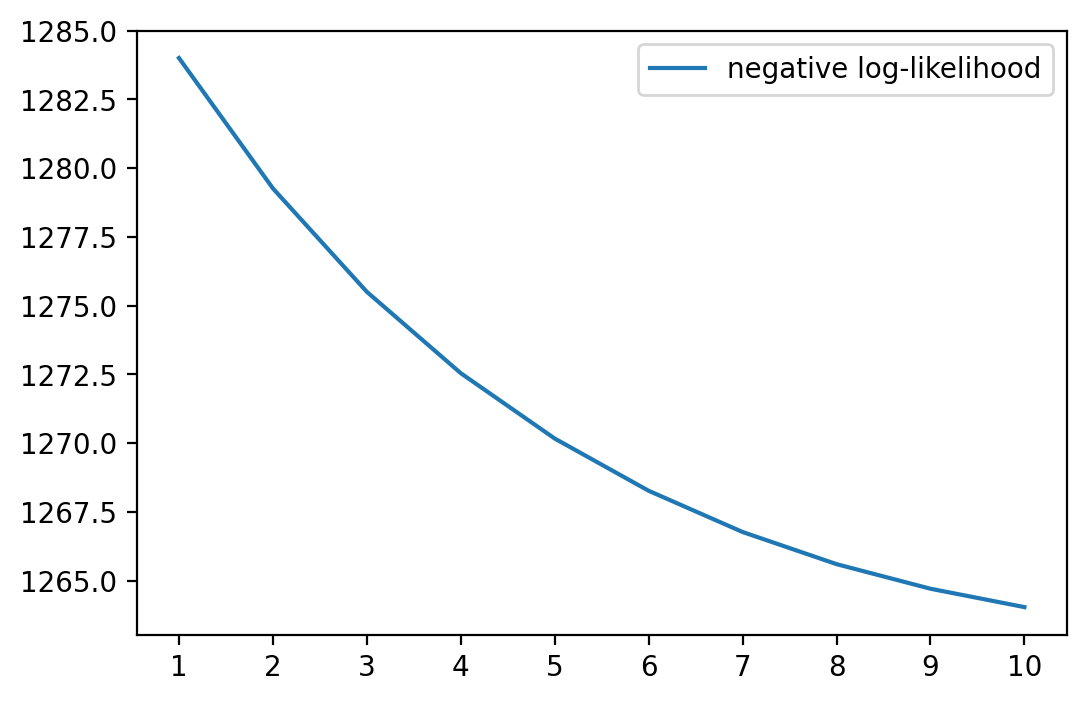

In [ ]:
#TODO: plot the loss function (log-likelihood)
plt.figure(dpi=200)
plt.plot(np.arange(1,num_iter*num_batch+1,step=1), losses, label='negative log-likelihood')
plt.xticks(np.arange(1,num_iter*num_batch+1,1))
plt.legend(bbox_to_anchor=(1,1))
plt.show()